In [1]:
import numpy as np 
import scipy.optimize
import matplotlib.pyplot as plt
import time

In [2]:
# Material properties
# YM: Young's Modulus [N/mm²]
# v: Poisson's ratio
# sigma_y: initial yield limit [N/mm²]
E, v, sigma_y = 2e5, 0.3, 250

## Isotropic hardening
# Q_iso: Isotropic asymptote [ 80 N/mm²] 
# n_iso: exponent [3]
# b_iso: growth rate [10]
# D_iso: limit [170 N/mm²]
Q_iso, n_iso, b_iso, D_iso = 50, 2, 100, 50

## Kinematic hardening
# Q_kin = Kinematic asymptote [N/mm²]
# b_kin: growth rate
Q_kin, b_kin = 75, 100

In [3]:
# maximum strain in x direction
strain_x_max = 5e-2

time_to_strain_x_max = 1

strain_rate = strain_x_max/time_to_strain_x_max

In [4]:
def strain(t):
    return strain_rate*t if t < time_to_strain_x_max else strain_x_max

In [5]:
def func_strain_rate(t):
    return strain_rate if t < time_to_strain_x_max else 0

In [6]:
def func_strain_rate(t):
    return strain_rate if t < time_to_strain_x_max else 0

In [7]:
def equivalent_stress(sigma, backstress):

    sigma_xx = sigma - backstress

    return np.sqrt(sigma_xx**2)

In [8]:
def sigma_macaulay(sigma, backstress, K, power):

    sigma_ex = equivalent_stress(sigma, backstress) - (sigma_y + K)

    return (sigma_ex/D_iso)**power if sigma_ex > 0 else 0

In [9]:
# time integration from 0 to 5000 [s]
t_min = 0
t_max = 2
delta_t = 1e-4 # time step
N = int((t_max-t_min)/delta_t)
T = np.linspace(t_min,t_max,N+1)

# initialise variables
t_i = 0
K_i = 0
X_i = 0
sigma_i = 1e-15

store_values = np.zeros((N+1,3))
strain_linspace = np.zeros((T.shape))

for i in range(N):

    ## common terms
    fc = 1/equivalent_stress(sigma_i, X_i) # [scalar]
    fd = sigma_macaulay(sigma_i, X_i, K_i, n_iso) # [scalar]

    sigma_i = sigma_i + delta_t * E * ( func_strain_rate(t_i) - fc * fd * (sigma_i - X_i) )

    K_i = K_i + delta_t * b_iso * (Q_iso-K_i) * fd

    X_i = X_i + delta_t * b_kin * ( (2/3) * Q_kin * fc * (sigma_i - X_i) - X_i ) * fd

    # store stress, isotropic, kinematic hardening
    store_values[i+1, 0] = sigma_i
    store_values[i+1, 1] = K_i
    store_values[i+1, 2] = X_i
    strain_linspace[i+1] = strain(t_i)
    
    # update variables
    t_i += delta_t

# Stress vs Time Plot

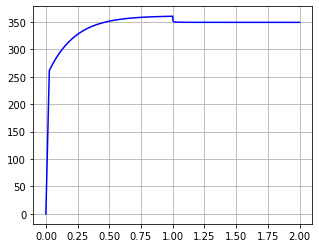

In [10]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(T, store_values[:,0], color = 'blue')

ax.grid()

plt.show()

# Isotropic and Kinematic Hardening

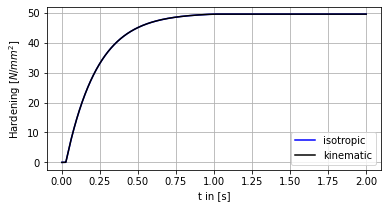

In [11]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(T, store_values[:,1], color = 'blue', label = 'isotropic')
ax.plot(T, store_values[:,2], color = 'black', label = 'kinematic')

ax.set_ylabel(r'Hardening $[N/mm^2]$')
ax.set_xlabel('t in [s]')
ax.legend(loc = 'lower right')
ax.grid()

plt.show()

# Strain vs time

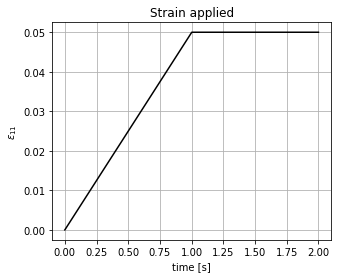

In [12]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(T, strain_linspace, color = 'black')

ax.set_title(r'Strain applied')
ax.set_xlabel('time [s]')
ax.set_ylabel(r'$\varepsilon_{11}$')
ax.grid()

plt.show()

# Stress vs Strain

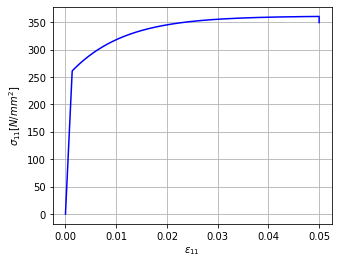

In [13]:
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(strain_linspace, store_values[:,0], color = 'blue')

ax.set_xlabel(r'$\varepsilon_{11}$')
ax.set_ylabel(r'$\sigma_{11} [N/mm^2]$')

ax.grid()
plt.show()